In [1]:
# Import Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Resources/HREmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [4]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print(f'{ y.value_counts()}')

0    1233
1     237
Name: Attrition, dtype: int64


### Imbalanced

In [5]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =5)

In [6]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print(f'{ y.value_counts()}')

0    1233
1     237
Name: Attrition, dtype: int64


In [7]:
# Create a Linear Regression model object
model = LogisticRegression(solver ='liblinear')

In [8]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [9]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

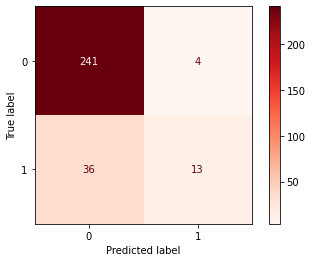

In [10]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Reds)

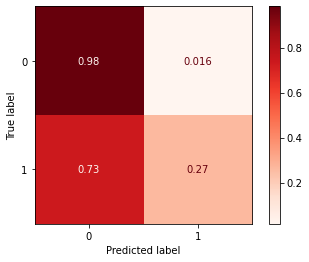

In [11]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [12]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.87      0.98      0.92       245
No Attrition       0.76      0.27      0.39        49

    accuracy                           0.86       294
   macro avg       0.82      0.62      0.66       294
weighted avg       0.85      0.86      0.84       294



### Balanced

In [15]:
# Create our Validation training and testing datasets with balancing.
#using undersampling to match the minority data
B = df[df['Attrition'] == 0].iloc[:237]
A = df[df['Attrition'] == 1].iloc[:237]

In [17]:
samp_df = pd.concat([A, B], ignore_index=True)
X = samp_df.drop(columns = ['Attrition'])
y = samp_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [18]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print(f'{ y.value_counts()}')

0    237
1    237
Name: Attrition, dtype: int64


In [19]:
# Create the Logistic Regression model object
model= LogisticRegression(solver = 'liblinear')

In [20]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

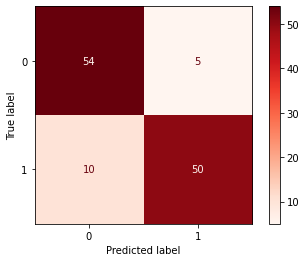

In [22]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

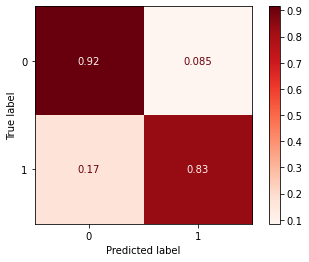

In [23]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [24]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.84      0.92      0.88        59
No Attrition       0.91      0.83      0.87        60

    accuracy                           0.87       119
   macro avg       0.88      0.87      0.87       119
weighted avg       0.88      0.87      0.87       119

